In this notebook, we will be clustering the iris dataset based on two of the three features(so we can visualize it easier)

In this first cell, we download our data and look at it.

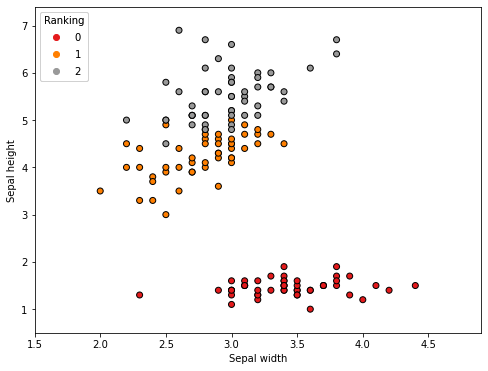

In [ ]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

fig, ax = plt.subplots(figsize=(8,6))

# Plot the training points
scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Ranking")
ax.add_artist(legend1)
ax.set_xlabel("Sepal width")
ax.set_ylabel("Sepal height")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.show()

Now we will write a function called k_means that clusters the data into k=3 groups. We want this function to take in the input features X and return the labels that cluster the data.

Now remember we are not trying to predict the labels, we simply want to cluster the data. Meaning that when we plot the data again with our new labels more than likely the colors will not match the one above. However the grouping will be very similar(assuming we did this right)

We will go over in class how this algorithm works but basically here are the steps:

1) create k random centroids to use that will later be optimized

2) Optimize the centroids by iterating either until some predefined max_iter or until the new centroids dont move very far from the preiously calculated centroids

2a) This can be done by finding the minimum of the sum of the squared difference (see example code below to understand this)

3) Then you update the position of the centroids by looking at the mean of the calculated labels (see example below)

4) Repeat this until some max iter or until the new position of the centroid does not move very much.

In [ ]:
#in our problem we have a bunch of points that we want to cluster
data = np.array([[1,1],[1.2,1.3],[7,7],[7.5,7],[25,25],[25,25.5]])

# As well as some centroids that we have to find and optimize
centroids = np.array([[1.5,1.5],[7.5,7.5],[26,26]])

# to find which points belong to a given cluster we simply minimize the sum of the squared differences
# The use of np.newaxis makes this somewhat easy to do. 
# Look through these print statments and try and understand what is happening. We are labeling the poins with their closest centroid.
print(np.shape(data - centroids[:,np.newaxis]))
print(np.sqrt((data - centroids[:,np.newaxis])**2))
print(np.sum(np.sqrt((data - centroids[:,np.newaxis])**2),axis=2))
print(np.argmin(np.sum(np.sqrt((data - centroids[:,np.newaxis])**2),axis=2),axis=0))
test_labels = np.argmin(np.sum(np.sqrt((data - centroids[:,np.newaxis])**2),axis=2),axis=0) 

(3, 6, 2)
[[[ 0.5  0.5]
  [ 0.3  0.2]
  [ 5.5  5.5]
  [ 6.   5.5]
  [23.5 23.5]
  [23.5 24. ]]

 [[ 6.5  6.5]
  [ 6.3  6.2]
  [ 0.5  0.5]
  [ 0.   0.5]
  [17.5 17.5]
  [17.5 18. ]]

 [[25.  25. ]
  [24.8 24.7]
  [19.  19. ]
  [18.5 19. ]
  [ 1.   1. ]
  [ 1.   0.5]]]
[[ 1.   0.5 11.  11.5 47.  47.5]
 [13.  12.5  1.   0.5 35.  35.5]
 [50.  49.5 38.  37.5  2.   1.5]]
[0 0 1 1 2 2]


In [ ]:
#You then want to update your new centroid locations. You want these locations to be the means of newly labeled datapoints 
# Do you see why we are taking the mean? We are shifting the algorithm to try and get an equal amount of points for each cluster.
new_centroids = []
for i in range(len(centroids)):
  new_centroids.append(np.mean(data[test_labels==i],axis=0))

print(new_centroids)

[array([1.1 , 1.15]), array([7.25, 7.  ]), array([25.  , 25.25])]


In [ ]:
def k_means(X, k, max_iter=100):
  ''' input: X (iris data (150,2) numpy array 
      output: labels array denoting which cluster each point belongs to
  ''' 
  #TODO: Write the function!!
  
  return labels
  

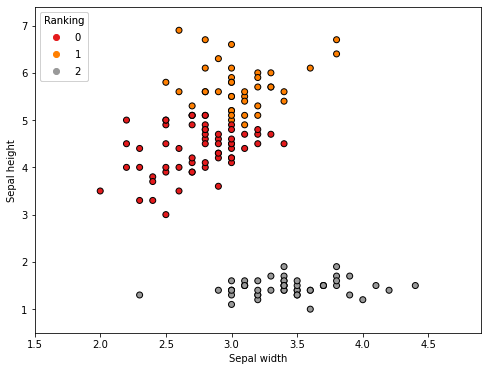

In [ ]:
labels = k_means(X,3)

fig, ax = plt.subplots(figsize=(8,6))

# Plot the training points
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Ranking")
ax.add_artist(legend1)
ax.set_xlabel("Sepal width")
ax.set_ylabel("Sepal height")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.show()